In [1]:
# load modules
import os
import numpy as np
import pandas as pd

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
os.path.join('data', 'house regression.csv')

'data\\house regression.csv'

In [3]:
# load data
#read_csv 함수에다가 path.join를 썼는데 이것은 경로를 만들어 준다.
#왜 이렇게 했냐면 내 데이터가 data 폴더 안에 있기 때문이다. 
#Y는 price이다. 나머지 정보들이 이제 input이 되는 것이다. 
data = pd.read_csv(os.path.join('data', 'house regression.csv'))
data.head()

,lat,long,bedrooms,bathrooms,floors,waterfront,grade,condition,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,year_2014,quarter_0,quarter_1,quarter_2,price
0,47.6747,-122.303,4,2.25,2.0,1,8,5,3750,5000,2440,1310,94,0,0,0,1,0,1310000
1,47.6914,-122.308,2,1.75,1.0,1,6,3,1390,6670,720,670,77,0,0,0,1,0,445500
2,47.5951,-122.144,5,2.00,1.5,1,7,3,1870,7344,1870,0,58,0,0,0,1,0,450000
3,47.3273,-122.370,3,2.00,1.0,1,7,4,1410,44866,1410,0,33,0,0,0,1,0,335000
4,47.3584,-122.163,5,3.00,2.0,1,9,3,3223,6371,3223,0,4,0,0,0,1,0,479349


In [6]:
# target variable: price
#이미 전처리를 해서 올려둔 데이터니까 그냥 쓰면 된다.
#이제 X와 y를 나눈다. drop함수를 이용해서 만든다. 
y = data['price'].values

X = data.drop('price', axis=1)
xcolumns = X.columns.values
X = X.values

In [8]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.10,
                                                    random_state=0)

### 1. Fit models

In [9]:
#이 패키지에 대해서 살펴보자. DTR을 살펴보면 옵션이 여러 개가 있다
#기본적으로 criterion이 있다. 여기선 거의다 디폴트 값으로 두겠다. 

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_tree = tree.predict(X_test)

In [10]:
#배깅도 찾아보면 파라미터가 여러 개 있는데 base_estimator를 넣어줘야 한다.
#부트스트랩으로 데이터를 나누고 각각 n개만큼 만들었을 때
#이 n개의 데이터 각각을 학습시키게 되는데 어떤 모델을 가지고 학습 시킬 것인지가
#바로 base_estimator이다. 우리는 여기서 DT를 사용한다.(수업시간에 우리는
#의사결정트리를 가지고 했었다)
#그리고 중요한 옵션이 뭐냐면 n_estimator이다. 이것은 몇개의 모델을 만들것인가이다.
#기본적으로 10개지만 우리는 100개를 만든다.
#이것을 가지고 이름을 treeBagging이라고 하겠다. 
treeBagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                               n_estimators=100)
#피팅을 한다
treeBagging.fit(X_train, y_train)
#테스트 데이터를 예측해서 이것을 y_treeBagging이라 명명한다.
y_treeBagging = treeBagging.predict(X_test)

In [11]:
#하나 더 비교해 본다.
lr = LinearRegression()
lr.fit(X_train, y_train)
#테스트 데이터를 예측해본다.
y_lr = lr.predict(X_test)

In [12]:
#이것은 linear regression으로 했으니까 lrBagging이라고 해본다. 
lrBagging = BaggingRegressor(base_estimator=LinearRegression(),
                             n_estimators=100)
lrBagging.fit(X_train, y_train)
#테스트 데이터를 예측한다.
y_lrBagging = lrBagging.predict(X_test)

### 2. Evaluation

In [14]:
#위에서 한 4가지를 평가해본다. 
mse_tree = mean_squared_error(y_test, y_tree)
mse_treeBagging = mean_squared_error(y_test, y_treeBagging)
mse_lr = mean_squared_error(y_test, y_lr)
mse_lrBagging = mean_squared_error(y_test, y_lrBagging)

r2_tree = r2_score(y_test, y_tree)
r2_treeBagging = r2_score(y_test, y_treeBagging)
r2_lr = r2_score(y_test, y_lr)
r2_lrBagging = r2_score(y_test, y_lrBagging)

In [15]:
#지금 보면 4가지가 나오는데 각각 별로 R^2와 MSE를 구했다 vanila는 기본 트리
#그리고 배깅을 이용한 트리 이렇게 나뉜다. 
#트리부터 살펴보자. 기본트리의 R-squared는 0.65 정도 된다
#근데 배깅을 이용하니까 R^2가 0.2정도 올라간다. 그리고 MSE도 많이 줄어들었다.
#기본 트리보다 배깅을 이용했을 때가 퍼포먼스가 좋았다
#선형회귀를 살펴보자. 
#배깅을 이용해서 봤을 때 크게 달라지지 않았다.
#왜그럴까요?
#왜냐면 이 앙상블을 배웠는데 앙상블은 두가지 목적이 있다 varinace 감소 목적과 bias
#감소목적이 있는데 여기선 배깅을 쓰는데 즉 variance를 감소하는 것이다
#variance는 모델이 복잡할 때 생긴다. 근데 여기 우리가 모델을 학습할 때
#DT를 학습할 떄 우리가 디폴트 옵션으로 학습했는데 디폴트가 max_depth가 none이다
#즉 디폴트일 때 fully grown가 되니까 복잡한 모델이 생기게 되는 것이다
#거기서 오버피팅이 발생하는데 이것을 어떻게 보면 배깅을 통해서 줄여준 것이다
#선형회귀는 모델 자체가 단순해서 variance 에러가 크지 않다
#그래서 배깅을 하더라도 크게 달라지지 않는다. 
print('[Tree   - vanila ] R-square = {:.2f} | MSE = {:.2f}'.format(r2_tree, mse_tree))
print('[Tree   - Bagging] R-square = {:.2f} | MSE = {:.2f}'.format(r2_treeBagging, mse_treeBagging))
print('[Linear - vanila ] R-square = {:.2f} | MSE = {:.2f}'.format(r2_lr, mse_lr))
print('[Linear - Bagging] R-square = {:.2f} | MSE = {:.2f}'.format(r2_lrBagging, mse_lrBagging))

[Tree   - vanila ] R-square = 0.65 | MSE = 47214301276.36
[Tree   - Bagging] R-square = 0.84 | MSE = 21952784466.35
[Linear - vanila ] R-square = 0.68 | MSE = 43817256018.48
[Linear - Bagging] R-square = 0.68 | MSE = 43720551271.64


### 3. Visualize

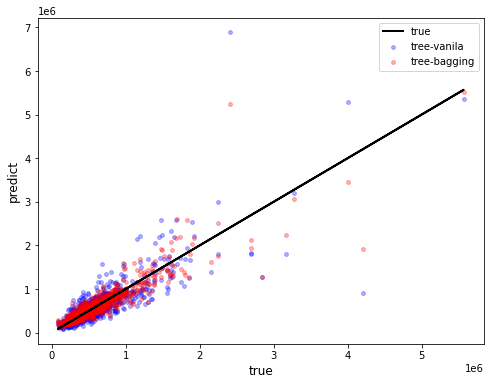

In [16]:
#시각화를 해보자.
#이 검정색 직선은 이 직선에 가까우면 가까울수록 좋은 결과이다.
#vanila tree를 보면 이 직선에 비교했을 떄 분산이 크다
#반면에 배깅을 했을 땐 근처에 있어서 분산이 줄어든 거을 볼 수 있다.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_tree, s=15, alpha=0.3, color='blue', label='tree-vanila')
plt.scatter(y_test, y_treeBagging, s=15, alpha=0.3, color='red', label='tree-bagging')
plt.plot(y_test, y_test, alpha=1.0, lw=2, color='black', label='true')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.legend()
plt.show()

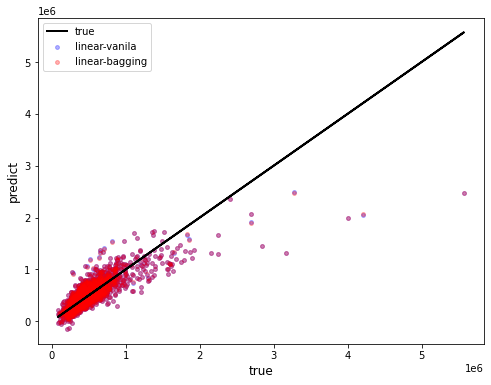

In [17]:
#여기서는 LR의 결과이ㅣ다
#지금 보면 아예 똑같다. 거의 차이가 없다는 것이다 완전히 겹쳐져 있다.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_lr, s=15, alpha=0.3, color='blue', label='linear-vanila')
plt.scatter(y_test, y_lrBagging, s=15, alpha=0.3, color='red', label='linear-bagging')
plt.plot(y_test, y_test, alpha=1.0, lw=2, color='black', label='true')
plt.xlabel('true', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.legend()
plt.show()

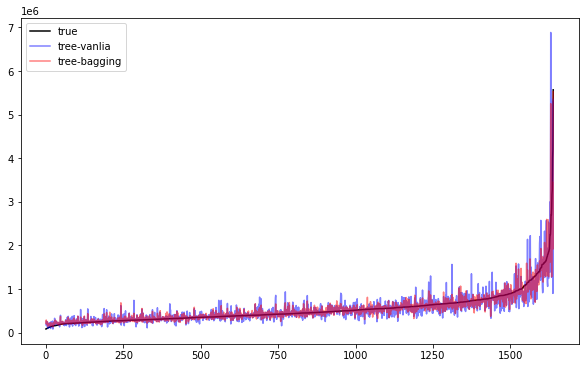

In [20]:
#이것도 똑같은 시각화를 위한 것인데. 
#여기서 보면 argsort()로 테스트 값을 작은값부터 큰값으로 sorting한 것이다 그것대로 인덱스를
#뽑아낸 것이고
#데이터를 작은 값부터 큰값으로 정렬해서 한 번 plotting해본 것이다
#그랬을 때 보면 검정색 선이 실제 값이고
#파랑색 선이 기존 DT고
#빨강색 선이 배깅인데
#작은 값에서 에러가 크게 발생했는지 큰 값에서 에러가 크게 발생했는지 한눈에 보인다
#배깅을 이용하면 전반적으로 그냥 트리보다는 에러가 대폭 줄어드는 것을 모든 y값에서
#확인 가능하다.
idx = y_test.argsort()

plt.figure(figsize=(10, 6))
plt.plot(y_test[idx], color='black', alpha=1.0, label='true')
plt.plot(y_tree[idx], color='blue', alpha=0.5, label='tree-vanlia')
plt.plot(y_treeBagging[idx], color='red', alpha=0.5, label='tree-bagging')
plt.legend()
plt.show()

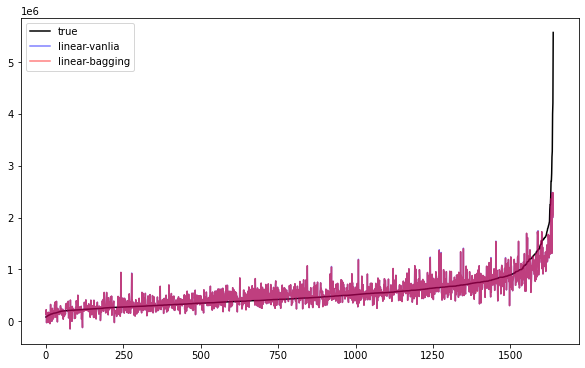

In [21]:
#LR  결과도 지금 두개가 크게 차이가 없다.
#이렇게 배깅에 대한 실습을 마친다. 
plt.figure(figsize=(10, 6))
plt.plot(y_test[idx], color='black', alpha=1.0, label='true')
plt.plot(y_lr[idx], color='blue', alpha=0.5, label='linear-vanlia')
plt.plot(y_lrBagging[idx], color='red', alpha=0.5, label='linear-bagging')
plt.legend()
plt.show()